# Loan Application Status Prediction

Project Description
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 
Independent Variables:
1.	Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases
2.	Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions
3.	Married - This refers to applicant being in a state of matrimony
4.	Dependents - This refres to persons who depends on the applicants for survival
5.	Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university
6.	Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer
7.	Applicant Income - This refers to disposable income available for the applicant's use under State law.
8.	CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.
9.	Loan_Amount - This refers to the amount of money an applicant owe at any given time.
10.	Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant
11.	Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.
12.	Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.
13.	Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.
You have to build a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset. 
Dataset Link-  https://github.com/dsrscientist/DSData/blob/master/loan_prediction.csv


In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [83]:
loan_df=pd.read_csv('loan_applications.csv')

In [84]:
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [85]:
#its shows the last five rows
loan_df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


Exploratory Data Analysis(EDA)

In [86]:
#Checking the dimenstion of the dataset
loan_df.shape

(614, 13)

The dataset contains 614 rows and 13 columns, out of which 1 is target variable and remaining 20 are independent variables

In [87]:
loan_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [88]:
# checking the columns of dataset
loan_df.columns.tolist()

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [89]:
#cheking the types of columns
loan_df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [90]:
#checking the null values
loan_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

We can see there are three formats of data types:

object: Object format means variables are categorical. Categorical variables in our dataset are Loan_ID, Gender, Married, Dependents, Education, Self_Employed, Property_Area, Loan_Status.
int64: It represents the integer variables. ApplicantIncome is of this format.
float64: It represents the variable that has some decimal values involved. They are also numerical

In [91]:
#first check null value ---sum of all the null value -----check the sum of all the values
loan_df.isnull().sum().sum()

149

In [92]:
#it finds the information about the dataframes
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


We can see there are three formats of data types:

object: Object format means variables are categorical. Categorical variables in our dataset are Loan_ID, Gender, Married, Dependents, Education, Self_Employed, Property_Area, Loan_Status.

int64: It represents the integer variables. ApplicantIncome is of this format.

float64: It represents the variable that has some decimal values involved. They are also numerical

In [93]:
loan_df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

we can assume that "NO" stands for the customers who have not taken loan and "yes" stands for the customers who have got a loan

Normalize can be set to True to print proportions instead of numbers

Description of Dataset

In [94]:
#Statistical summary of numerical columns
loan_df.describe() 

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


This gives the statistical information of the numerical columns. The summary of the Datasets looks perpect since there is no negative/incvalid values present

From the above description we can observe the following:-

The counts of all the columns are not same which means there are is missing value in the datssets
the mean value is greater than the median(50%) in ApplicantIncome, co applicant income & loan Amount,  columns which means the data is skewed to right in these columns
The data in the column loan amount Term, credit_history have mean value less than median which means the data is skewd to left

By Summarizing the data we can observe there is a huge difference between 75% and max hence there are outliers present in tha data

we can also notice the standard deviation, min,25% percentile values from this describe method

Normalize can be set to True to print proportions instead of number

# Data Visualization

# Univariate Analysis

Now, let's visualize each variable separately. Different types of variables are Categorical, ordinal, and numerical.

Categorical features: These features have categories (Gender, Married, Self_Employed, Credit_History, Loan_Status)

Ordinal features: Variables in categorical features having some order involved (Dependents, Education, Property_Area)

Numerical features: These features have numerical values (ApplicantIncome, Co-applicantIncome, LoanAmount, Loan_Amount_Term)


# Categorical features:

Independent variable( Categorical features):These features have categories (Gender, Married, Self_Employed, Credit_History, Loan_Status)

Y    422
N    192
Name: Loan_Status, dtype: int64


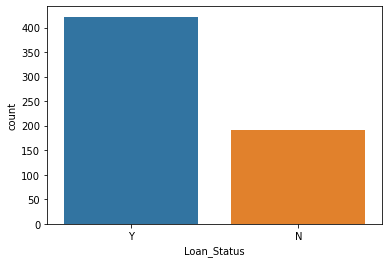

In [95]:
#Visualize the number of loan Status
ax = sns.countplot(x='Loan_Status',data=loan_df)
print(loan_df['Loan_Status'].value_counts())

The loan of 422(around 69%) people out of 614 were approved.

Male      489
Female    112
Name: Gender, dtype: int64


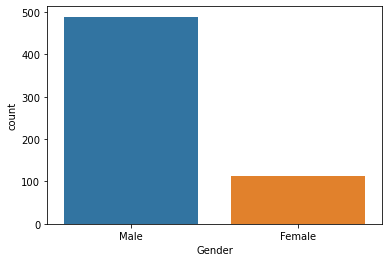

In [96]:
ax = sns.countplot(x='Gender',data=loan_df)
print(loan_df['Gender'].value_counts())

In the above loan application there are 489 male applicants & also 112 female applicants

Yes    398
No     213
Name: Married, dtype: int64


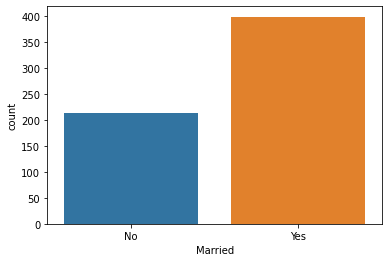

In [97]:
ax = sns.countplot(x='Married',data=loan_df)
print(loan_df['Married'].value_counts())

loan application status there are married people are 398 Unmarried applicants are 213

# Ordinal features: 

Independent variable (Ordinal features): Variables in categorical features having some order involved (Dependents, Education, Property_Area)

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


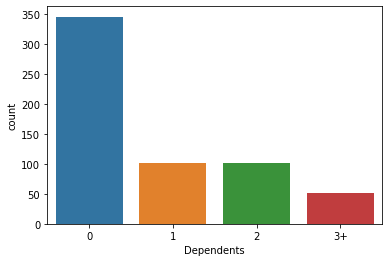

In [98]:
ax = sns.countplot(x='Dependents',data=loan_df)
print(loan_df['Dependents'].value_counts())

Most of the applicants don't have any dependents

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


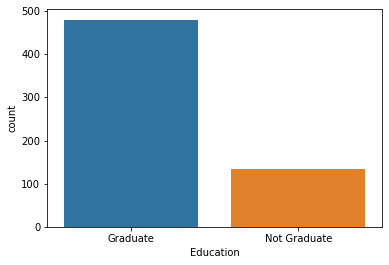

In [99]:
ax = sns.countplot(x='Education',data=loan_df)
print(loan_df['Education'].value_counts())

480 people are graduated out of 614 applicants

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


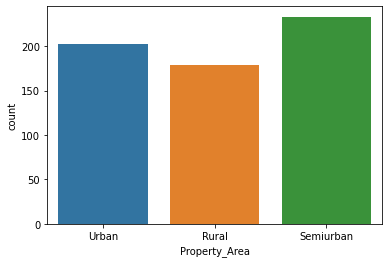

In [100]:
ax = sns.countplot(x='Property_Area',data=loan_df)
print(loan_df['Property_Area'].value_counts())

Most of the applicants from the Semi-urban area

# Numerical features: 

Independet variable(Numerical features): These features have numerical values (ApplicantIncome, Co-applicantIncome, LoanAmount, Loan_Amount_Term)

Till now we have seen the categorical and ordinal variables and now let's visualize the numerical variables. Let's look at the distribution of Applicant income first.

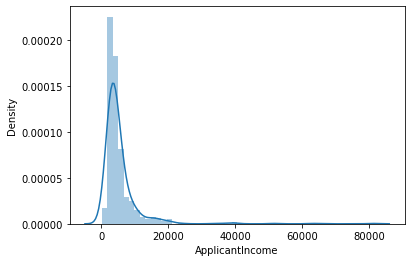

<AxesSubplot:>

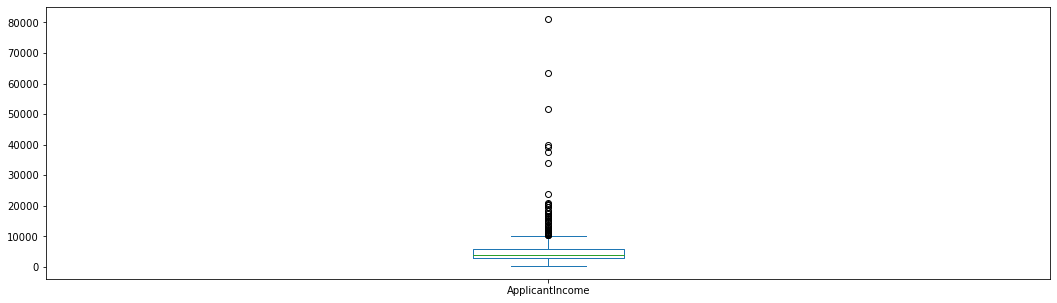

In [101]:
sns.distplot(loan_df['ApplicantIncome'])
plt.show()
loan_df['ApplicantIncome'].plot.box(figsize=(18,5))

The above distplot shows It can be inferred that most of the data in the distribution of applicant income are towards the left which means it is not normally distributed. We will try to make it normal in later sections as algorithms work better if the data is normally distributed.

The boxplot confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society. Part of this can be driven by the fact that we are looking at people with different education levels. Let us segregate them by Education.

Text(0.5, 0.98, '')

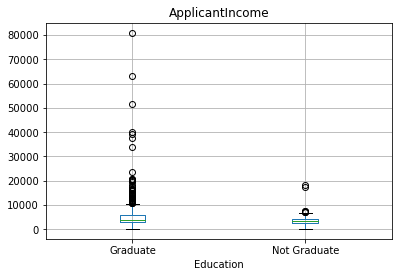

In [102]:
loan_df.boxplot(column='ApplicantIncome', by='Education')
plt.suptitle("")

We can see that there are a higher number of graduates with very high incomes, which are appearing to be outliers.

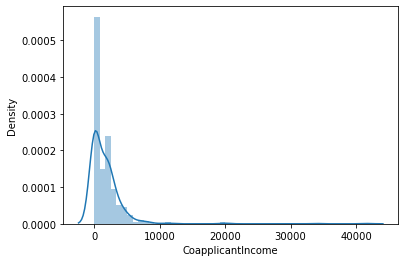

<AxesSubplot:>

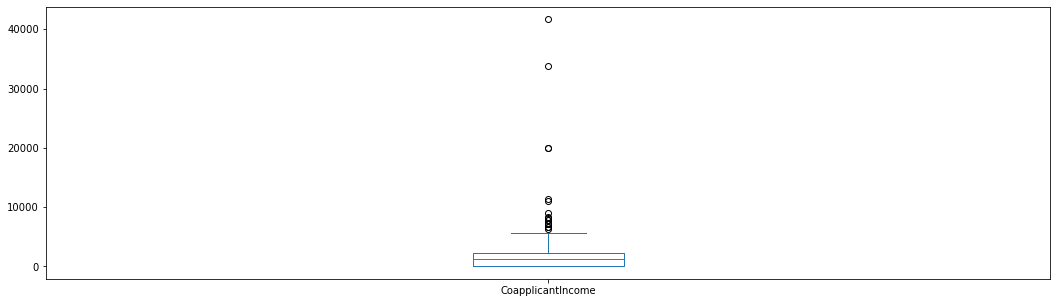

In [103]:
sns.distplot(loan_df['CoapplicantIncome'])
plt.show()
loan_df['CoapplicantIncome'].plot.box(figsize=(18,5))

We see a similar distribution as that of the applicant's income, The majority of co-applicants income ranges from 0 to 5000. We also see a lot of outliers in the applicant's income and it is not normally distributed.

Text(0.5, 0.98, '')

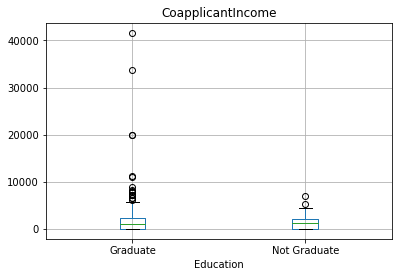

In [104]:
loan_df.boxplot(column='CoapplicantIncome', by='Education')
plt.suptitle("")

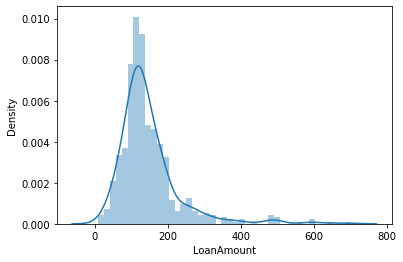

<AxesSubplot:>

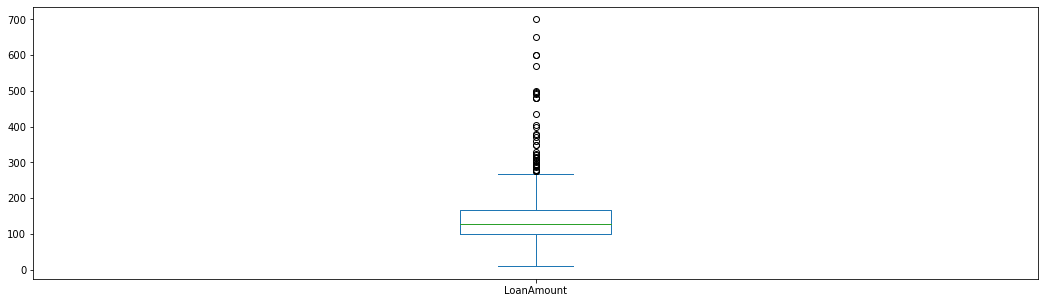

In [105]:
sns.distplot(loan_df['LoanAmount'])
plt.show()
loan_df['LoanAmount'].plot.box(figsize=(18,5))

We see a lot of outliers in this variable and the distribution is fairly normal. We will treat the outliers in later sections.

Let’s recall some of the hypotheses that we generated earlier:

Applicants with high incomes should have more chances of loan approval.

Applicants who have repaid their previous debts should have higher chances of loan approval.

Loan approval should also depend on the loan amount. If the loan amount is less, the chances of loan approval should be high.

Lesser the amount to be paid monthly to repay the loan, the higher the chances of loan approval.

# Bivariate Analysis

After looking at every variable individually in univariate analysis, we will now explore them again with respect to the target variable.

# Categorical Independent Variable vs Target Variable

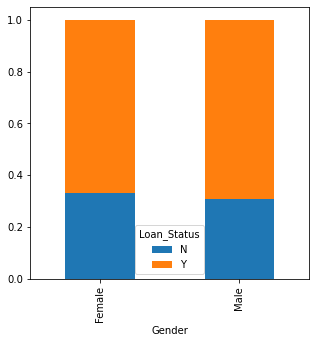

In [106]:
#creating a cross -tabulation of gender and loan status
Gender = pd.crosstab(loan_df['Gender'], loan_df['Loan_Status'])

#Compute the row wise sum and divide each row by its sum to get proportinal
Gender_proportions = Gender.div(Gender.sum(1).astype(float),axis=0)

#plot the stacked bar chart

Gender_proportions.plot(kind='bar', stacked=True, figsize=(5,5))

plt.show()

It can be inferred that the proportion of male and female applicants is more or less the same for both approved and unapproved loans.

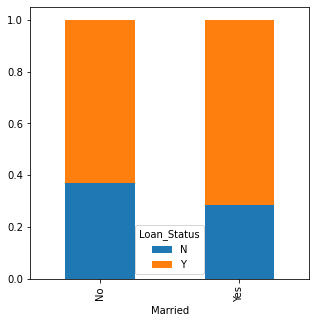

In [107]:
Married = pd.crosstab(loan_df['Married'], loan_df['Loan_Status'])

Married_proportions = Married.div(Married.sum(1).astype(float),axis=0)

Married_proportions.plot(kind='bar', stacked=True, figsize=(5,5))

plt.show()

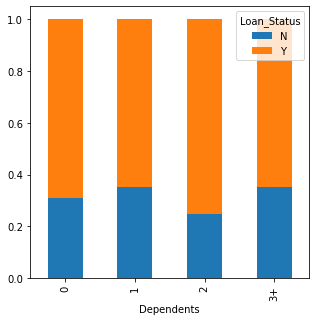

In [108]:
Dependents = pd.crosstab(loan_df['Dependents'], loan_df['Loan_Status'])

Dependents_proportions = Dependents.div(Dependents.sum(1).astype(float),axis=0)

Dependents_proportions.plot(kind='bar', stacked=True, figsize=(5,5))

plt.show()

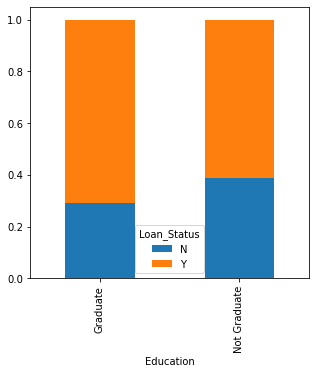

In [109]:
Education = pd.crosstab(loan_df['Education'], loan_df['Loan_Status'])

Education_proportions = Education.div(Education.sum(1).astype(float),axis=0)

Education_proportions.plot(kind='bar', stacked=True, figsize=(5,5))

plt.show()

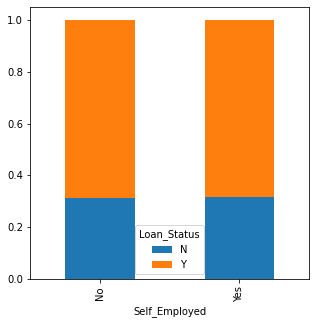

In [110]:
Self_Employed = pd.crosstab(loan_df['Self_Employed'], loan_df['Loan_Status'])

Self_Employed_proportions = Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0)

Self_Employed_proportions.plot(kind='bar', stacked=True, figsize=(5,5))

plt.show()

The proportion of married applicants is higher for approved loans.

Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.

There is nothing significant we can infer from Self_Employed vs Loan_Status plot.

Now we will look at the relationship between remaining categorical independent variables and Loan_Status.

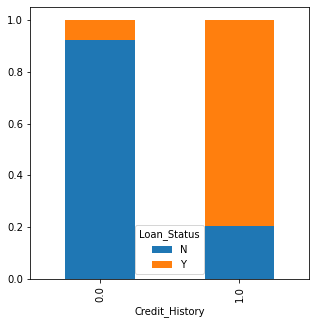

In [111]:
Credit_History = pd.crosstab(loan_df['Credit_History'], loan_df['Loan_Status'])

Credit_History_proportions = Credit_History.div(Credit_History.sum(1).astype(float),axis=0)

Credit_History_proportions.plot(kind='bar', stacked=True, figsize=(5,5))

plt.show()

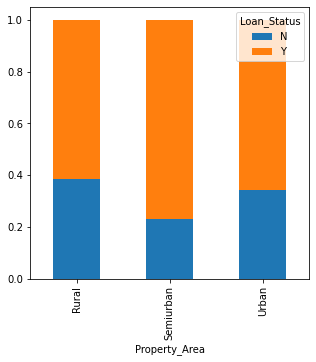

In [112]:
Property_Area = pd.crosstab(loan_df['Property_Area'], loan_df['Loan_Status'])

Property_Area_proportions = Property_Area.div(Property_Area.sum(1).astype(float),axis=0)

Property_Area_proportions.plot(kind='bar', stacked=True, figsize=(5,5))

plt.show()

It seems people with a credit history as 1 are more likely to get their loans approved.

The proportion of loans getting approved in the semi-urban area is higher as compared to that in rural or urban areas.

Now let’s visualize numerical independent variables with respect to the target variable.

# Numerical Independent Variable vs Target Variable

We will try to find the mean income of people for which the loan has been approved vs the mean income of people for which the loan has not been approved.

<AxesSubplot:xlabel='Loan_Status'>

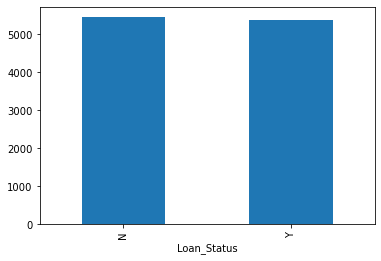

In [113]:
loan_df.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

Here the y-axis represents the mean applicant income. We don’t see any change in the mean income. So, let’s make bins for the applicant income variable based on the values in it and analyze the corresponding loan status for each bin.

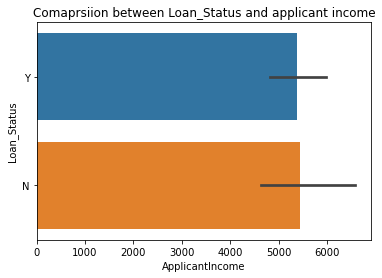

In [114]:
plt.title("Comaprsiion between Loan_Status and applicant income")
sns.barplot(x="ApplicantIncome", y= "Loan_Status", data = loan_df)
plt.show()

By examining the plot, you can observe whether there are any patterns or trends in loan approval based on the applicant's income. For example, if the bars for "Loan_Status" are consistently higher or lower for specific ranges of "ApplicantIncome," it could indicate that income plays a significant role in loan approval decisions.

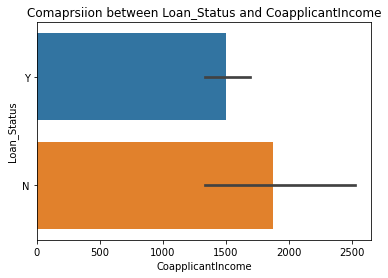

In [115]:
plt.title("Comaprsiion between Loan_Status and CoapplicantIncome")
sns.barplot(x="CoapplicantIncome", y= "Loan_Status", data = loan_df)
plt.show()

If co-applicant income is less the chances of loan approval are heigh

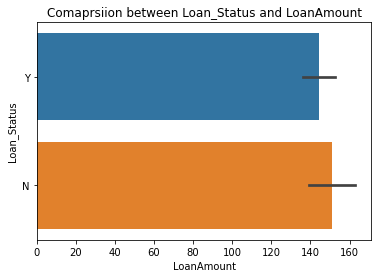

In [116]:
plt.title("Comaprsiion between Loan_Status and LoanAmount")
sns.barplot(x="LoanAmount", y= "Loan_Status", data = loan_df)
plt.show()

lesser loan amount the chances of loan approval is more comapred to high loan amount

# Multivariate Analysis

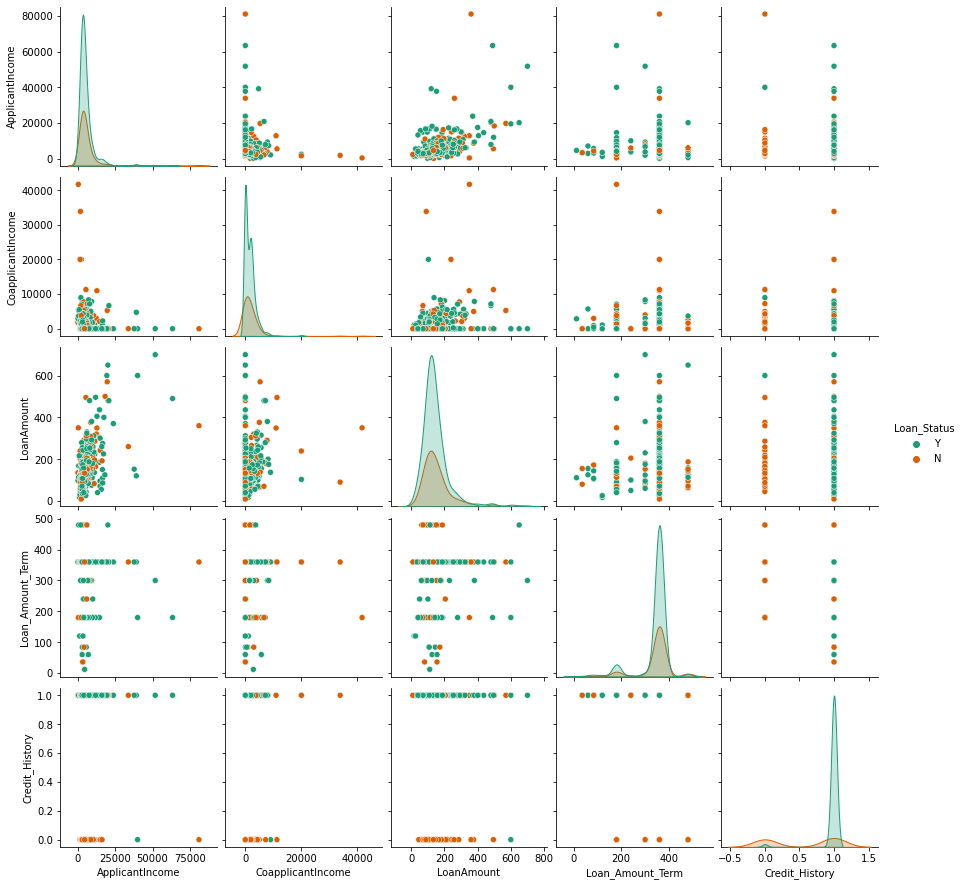

In [117]:
#for more than two coloumns using multivariate
sns.pairplot(loan_df, hue="Loan_Status", palette="Dark2")
plt.show()

In [118]:
#Separting Numerical and categorical column

#checking for Categorical columns
categorical_col = []
for i in loan_df.dtypes.index:
    if loan_df.dtypes[i] == "object":     #dtypes[i]-dtypes of any columns object it will append that columns in empty list 
        categorical_col.append(i)    #append method is used to add the value in your existing list
print("Categorical Columns:", categorical_col)
print("\n")

#Checking for Numerical columns
#Explanatory mark is used for not- when the condition my datatype is not object in that time  
#cont--is not satisifed in that time it append the numerical list
numerical_col = []        #creating empty list
for i in loan_df.dtypes.index:
    if loan_df.dtypes[i]!='object':      
        numerical_col.append(i)
print("Numerical Columns:", numerical_col)

Categorical Columns: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


Numerical Columns: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


We will change the 3+ in dependents variable to 3 to make it a numerical variable.

# Missing value imputation

In [119]:
loan_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are missing values in Gender, married, Dependent, Self_employed, Loan Amount, Loan amount term, credit History

We will treat the missing values in all the features one by one.

We can consider these methods to fill the missing values:

For numerical variables: imputation using mean or median

For categorical variables: imputation using mode

There are very few missing values in Gender, Married, Dependents, Credit_History, and Self_Employed features so we can fill them using the mode of the features.

In [120]:
loan_df['Gender'].fillna(loan_df['Gender'].mode()[0], inplace=True)
loan_df['Married'].fillna(loan_df['Married'].mode()[0], inplace=True)
loan_df['Dependents'].fillna(loan_df['Dependents'].mode()[0], inplace=True)
loan_df['Self_Employed'].fillna(loan_df['Self_Employed'].mode()[0], inplace=True)
loan_df['Credit_History'].fillna(loan_df['Credit_History'].mode()[0], inplace=True)


In [121]:
loan_df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [122]:
loan_df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

It can be seen that in the loan amount term variable, the value of 360 is repeating the most. So we will replace the missing values in this variable using the mode of this variable.

In [123]:
loan_df['Loan_Amount_Term'].fillna(loan_df['Loan_Amount_Term'].mode()[0], inplace=True)

In [124]:
loan_df['LoanAmount'].fillna(loan_df['LoanAmount'].median(), inplace=True)

In [125]:
loan_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Checking for Outliers

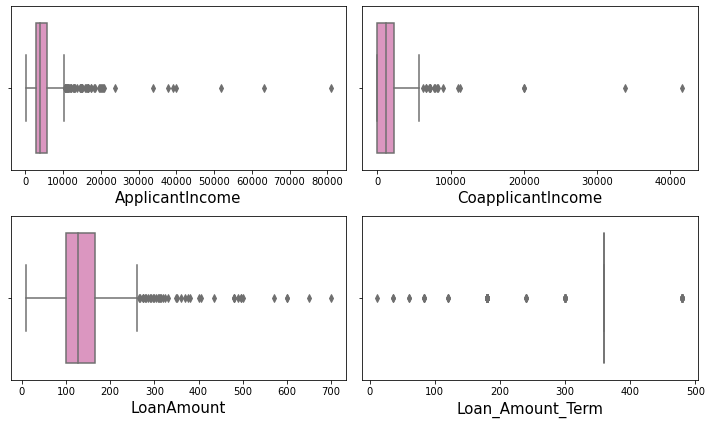

In [126]:
#lets check  the outliers by plotting boxplot.
#to detect the outlers using inter Quartile method
plt.figure(figsize=(10, 6), facecolor="white")
plotnumber=1
for col in numerical_col:
    if plotnumber<=4:
        ax=plt.subplot(2, 2, plotnumber)
        sns.boxplot(loan_df[col], palette= "Set2_r")
        plt.xlabel(col, fontsize = 15)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.tight_layout()

from the above graph shows the outliers are present in the data

In [127]:
loan_df.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.743053
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
dtype: float64

We are/don't not going to remove the skwness from the target variable as well as categorical variables,

here my outcome is category data first thing as well as its my target variables

Otcome of the skewness: Skewness threshold is taken is +/-0.5. columns which are having skewness

Removing Skewness¶

In [128]:
#Removing skewness using cuberoot method

loan_df['ApplicantIncome']=np.cbrt(loan_df['ApplicantIncome'])
loan_df['CoapplicantIncome']=np.cbrt(loan_df['CoapplicantIncome'])
loan_df['LoanAmount']=np.cbrt(loan_df['LoanAmount'])
loan_df['Loan_Amount_Term']=np.cbrt(loan_df['Loan_Amount_Term'])
loan_df['Credit_History']=np.cbrt(loan_df['Credit_History'])

In [129]:
loan_df.skew()

ApplicantIncome      2.083638
CoapplicantIncome    0.196726
LoanAmount           0.862715
Loan_Amount_Term    -3.578100
Credit_History      -2.021971
dtype: float64

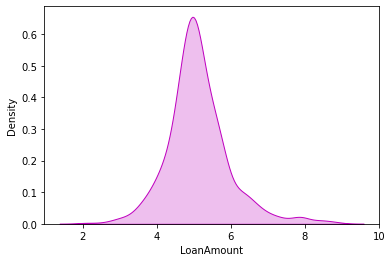

In [130]:
sns.distplot(loan_df['LoanAmount'], color="m", kde_kws={"shade":True}, hist = False)
plt.show()

In [131]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


In [132]:
loan_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,18.017473,0.000000,5.039684,7.113787,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,16.610522,11.467457,5.039684,7.113787,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,14.422496,0.000000,4.041240,7.113787,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,13.720654,13.310098,4.932424,7.113787,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,18.171206,0.000000,5.204828,7.113787,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,14.260431,0.000000,4.140818,7.113787,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,16.013010,0.000000,3.419952,5.646216,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,20.059821,6.214465,6.324704,7.113787,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,19.646281,0.000000,5.718479,7.113787,1.0,Urban,Y


In [133]:
# Dropping Loan_ID column
loan_df.drop(['Loan_ID'],axis=1,inplace=True)

Encoding categorical columns

In [134]:
obj = (loan_df.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 7


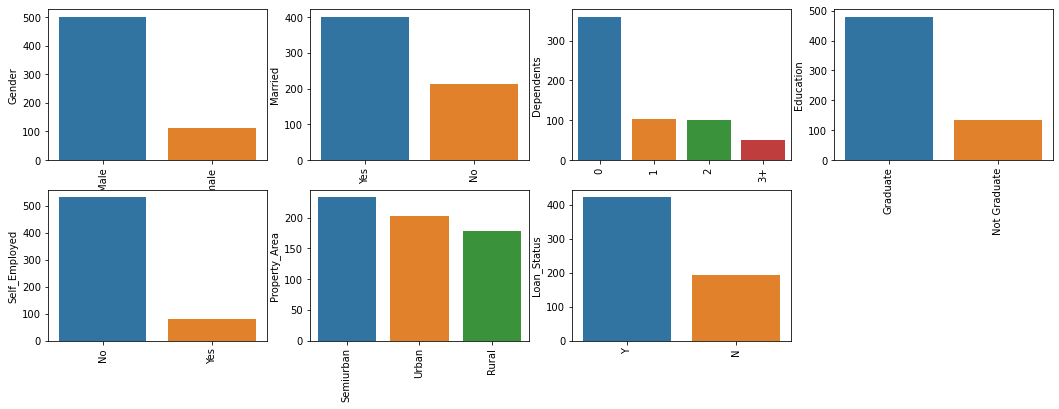

In [135]:

obj = (loan_df.dtypes == 'object')
object_cols = list(obj[obj].index)
plt.figure(figsize=(18,36))
index = 1
  
for col in object_cols:
  y = loan_df[col].value_counts()
  plt.subplot(11,4,index)
  plt.xticks(rotation=90)
  sns.barplot(x=list(y.index), y=y)
  index +=1

In [136]:
# Import label encoder
from sklearn import preprocessing
    
# label_encoder object knows how 
# to understand word labels.
label_encoder = preprocessing.LabelEncoder()
obj = (loan_df.dtypes == 'object')
for col in list(obj[obj].index):
  loan_df[col] = label_encoder.fit_transform(loan_df[col])

In [138]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int32  
 1   Married            614 non-null    int32  
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int32  
 5   ApplicantIncome    614 non-null    float64
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int32  
 11  Loan_Status        614 non-null    int32  
dtypes: float64(5), int32(7)
memory usage: 40.9 KB


# Data Cleaning:

Removing the Outliers

In [139]:
x=loan_df.iloc[:,:-1] # ----- i am slecting all the rows & columns except last columns-1
y=loan_df.iloc[:,-1]

In [140]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,18.017473,0.000000,5.039684,7.113787,1.0,2
1,1,1,1,0,0,16.610522,11.467457,5.039684,7.113787,1.0,0
2,1,1,0,0,1,14.422496,0.000000,4.041240,7.113787,1.0,2
3,1,1,0,1,0,13.720654,13.310098,4.932424,7.113787,1.0,2
4,1,0,0,0,0,18.171206,0.000000,5.204828,7.113787,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,14.260431,0.000000,4.140818,7.113787,1.0,0
610,1,1,3,0,0,16.013010,0.000000,3.419952,5.646216,1.0,0
611,1,1,1,0,0,20.059821,6.214465,6.324704,7.113787,1.0,2
612,1,1,2,0,0,19.646281,0.000000,5.718479,7.113787,1.0,2


In [141]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

In [142]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(x))    
z.shape

(614, 11)

In [143]:
threshold=3      # 1st arry are rows -13th row and 2nd columns outlierrs are present
print(np.where(z>3))

(array([ 14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 183, 185,
       242, 262, 308, 313, 333, 333, 369, 409, 443, 487, 495, 497, 506,
       523, 546, 561, 568, 575, 581, 585, 600, 604], dtype=int64), array([8, 8, 8, 5, 7, 8, 5, 7, 5, 7, 7, 5, 5, 8, 8, 7, 8, 5, 7, 7, 5, 5,
       7, 8, 8, 7, 7, 8, 7, 7, 8, 6, 8, 6, 7], dtype=int64))


In [145]:
loan_df1=loan_df[(z<3).all(axis=1)]
print(loan_df.shape)
print(loan_df1.shape)

#x.shapeloan_

(614, 12)
(582, 12)


In [146]:
x=x[(z<3).all(axis=1)] #this categorical variables
x.shape

(582, 11)

In [147]:
y=y[(z<3).all(axis=1)]
y.shape

(582,)

In [148]:
loss_percent=(614-582)/614*100
print(loss_percent)

5.211726384364821


Model Without outliers is df1 and model with desired outliers is df:

In [149]:
#By using the power tranform method we are removing the outliers
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [150]:
x

array([[ 0.47189943, -1.36638028, -0.81192464, ...,  0.12986563,
         0.41639776,  1.20004324],
       [ 0.47189943,  0.73186068,  0.89602824, ...,  0.12986563,
         0.41639776, -1.34196068],
       [ 0.47189943,  0.73186068, -0.81192464, ...,  0.12986563,
         0.41639776,  1.20004324],
       ...,
       [ 0.47189943,  0.73186068,  0.89602824, ...,  0.12986563,
         0.41639776,  1.20004324],
       [ 0.47189943,  0.73186068,  1.34105245, ...,  0.12986563,
         0.41639776,  1.20004324],
       [-2.11909557, -1.36638028, -0.81192464, ...,  0.12986563,
        -2.40154989,  0.01814056]])

In [151]:
from sklearn.preprocessing  import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.47189943, -1.36638028, -0.81192464, ...,  0.12986563,
         0.41639776,  1.20004324],
       [ 0.47189943,  0.73186068,  0.89602824, ...,  0.12986563,
         0.41639776, -1.34196068],
       [ 0.47189943,  0.73186068, -0.81192464, ...,  0.12986563,
         0.41639776,  1.20004324],
       ...,
       [ 0.47189943,  0.73186068,  0.89602824, ...,  0.12986563,
         0.41639776,  1.20004324],
       [ 0.47189943,  0.73186068,  1.34105245, ...,  0.12986563,
         0.41639776,  1.20004324],
       [-2.11909557, -1.36638028, -0.81192464, ...,  0.12986563,
        -2.40154989,  0.01814056]])

In [152]:
y.value_counts()
#Data is not balanced  in thatbcase we will use the oversampling method

1    402
0    180
Name: Loan_Status, dtype: int64

In [153]:
# Oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x,y = SM.fit_resample(x, y)

In [154]:
#Checking value count of traget column
y.value_counts()

1    402
0    402
Name: Loan_Status, dtype: int64

Since the outcome has only two variable we will binary classification model

In [155]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

Splitting the dataframe:

In [156]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state", i,"The model perform very well")
        print("At random_state:-",i)
        print("Training accuracy is:-", accuracy_score(y_train,pred_train)*100)
        print("Testing accuracy is:-", accuracy_score(y_test,pred_test)*100)

At random state 28 The model perform very well
At random_state:- 28
Training accuracy is:- 72.00622083981337
Testing accuracy is:- 72.04968944099379
At random state 40 The model perform very well
At random_state:- 40
Training accuracy is:- 72.00622083981337
Testing accuracy is:- 72.04968944099379
At random state 116 The model perform very well
At random_state:- 116
Training accuracy is:- 70.76205287713842
Testing accuracy is:- 70.80745341614907
At random state 188 The model perform very well
At random_state:- 188
Training accuracy is:- 71.3841368584759
Testing accuracy is:- 71.42857142857143
At random state 220 The model perform very well
At random_state:- 220
Training accuracy is:- 71.3841368584759
Testing accuracy is:- 71.42857142857143
At random state 241 The model perform very well
At random_state:- 241
Training accuracy is:- 72.00622083981337
Testing accuracy is:- 72.04968944099379
At random state 642 The model perform very well
At random_state:- 642
Training accuracy is:- 71.3841

In [157]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=5)

In [158]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.62      0.34      0.44        77
           1       0.57      0.81      0.67        84

    accuracy                           0.58       161
   macro avg       0.60      0.57      0.55       161
weighted avg       0.59      0.58      0.56       161



Cross Validation score for logistic Regression:

In [160]:
pred_lr = lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss = accuracy_score(y_test,pred_lr)
for j in range(2,10):
    lsscore = cross_val_score(lr,x,y,cv=j) #lr-linear reg, x, y pass the data to future &target value, cv=j is the defult value of the 
                                             #x1, y1 data is the after balancing the data 
    lsc = lsscore.mean()
    print("At cv:-",j)
    print("Cross validation score is:-",lsc*100)
    print("accuracy_score:-",lss*100)
    print("\n")

At cv:- 2
Cross validation score is:- 70.02487562189054
accuracy_score:- 75.77639751552795


At cv:- 3
Cross validation score is:- 69.77611940298507
accuracy_score:- 75.77639751552795


At cv:- 4
Cross validation score is:- 69.77611940298507
accuracy_score:- 75.77639751552795


At cv:- 5
Cross validation score is:- 69.77406832298138
accuracy_score:- 75.77639751552795


At cv:- 6
Cross validation score is:- 70.39800995024875
accuracy_score:- 75.77639751552795


At cv:- 7
Cross validation score is:- 69.64694344557046
accuracy_score:- 75.77639751552795


At cv:- 8
Cross validation score is:- 70.01237623762376
accuracy_score:- 75.77639751552795


At cv:- 9
Cross validation score is:- 69.52004438895824
accuracy_score:- 75.77639751552795




In [161]:
lsscore_selected = cross_val_score(lr,x,y,cv=3).mean()
print("The cv score is:", lsscore_selected,"\nThe accuracy score is:",lss)

The cv score is: 0.6977611940298507 
The accuracy score is: 0.7577639751552795


In [162]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
predRFC = RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test, predRFC))

0.8509316770186336
[[68  9]
 [15 69]]
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        77
           1       0.88      0.82      0.85        84

    accuracy                           0.85       161
   macro avg       0.85      0.85      0.85       161
weighted avg       0.85      0.85      0.85       161



In [163]:
score = cross_val_score(RFC,x,y,cv=3)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is :- ", accuracy_score(y_test, predRFC)-score.mean())

[0.79104478 0.84701493 0.8619403 ]
0.8333333333333334
Difference between Accuracy score and cross validation score is :-  0.017598343685300222


In [164]:
#support vector classification
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test, predsvc))

0.7577639751552795
[[52 25]
 [14 70]]
              precision    recall  f1-score   support

           0       0.79      0.68      0.73        77
           1       0.74      0.83      0.78        84

    accuracy                           0.76       161
   macro avg       0.76      0.75      0.75       161
weighted avg       0.76      0.76      0.76       161



In [166]:
#Cheking Cv score for support vector Machine classifier

score = cross_val_score(svc, x, y)
print(score)
print(score.mean())
print("Difference between Accuracy score is -", accuracy_score(y_test,predsvc)-score.mean())

[0.72670807 0.72670807 0.74534161 0.67701863 0.75      ]
0.7251552795031055
Difference between Accuracy score is - 0.03260869565217395


In [167]:
#checking accuracy for gradient boosting Classifier

GB = GradientBoostingClassifier()
GB.fit(x_train, y_train)
predGB = GB.predict(x_test)
print(accuracy_score(y_test, predGB))
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test, predGB))

0.84472049689441
[[61 16]
 [ 9 75]]
              precision    recall  f1-score   support

           0       0.87      0.79      0.83        77
           1       0.82      0.89      0.86        84

    accuracy                           0.84       161
   macro avg       0.85      0.84      0.84       161
weighted avg       0.85      0.84      0.84       161



In [168]:
#checking accuracy for ExtraTreeclassifier
ET = ExtraTreesClassifier()
ET.fit(x_train, y_train)
predET = ET.predict(x_test)
print(accuracy_score(y_test, predET))
print(confusion_matrix(y_test, predET))
print(classification_report(y_test, predET))

0.8509316770186336
[[68  9]
 [15 69]]
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        77
           1       0.88      0.82      0.85        84

    accuracy                           0.85       161
   macro avg       0.85      0.85      0.85       161
weighted avg       0.85      0.85      0.85       161



In [169]:
#cheking the cv score for extra Tree classifier

score = cross_val_score(ET, x, y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is:- ", accuracy_score(y_test, predET)-score.mean())

[0.79503106 0.8136646  0.8757764  0.86956522 0.875     ]
0.845807453416149
Difference between Accuracy score and cross validation score is:-  0.0051242236024845456


Hyper parameter tuning

In [170]:
# ExtraTress Classifier
from sklearn.model_selection import GridSearchCV

parameters = {'criterion': ['gini', 'entropy'],
             'random_state':[10, 50, 100],
             'max_depth':[0, 10 ,20],
             'n_jobs': [-2, -1, 1],
             'n_estimators' : [50, 100, 200, 300]}

In [171]:
GCV = GridSearchCV(ExtraTreesClassifier(), parameters , cv= 3 )

In [173]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1], 'random_state': [10, 50, 100]})

In [174]:
#google search - sklearn gradientBoosting Classifier

In [175]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'n_estimators': 100,
 'n_jobs': -2,
 'random_state': 100}

In [176]:
Final_model = ExtraTreesClassifier(criterion = 'gini', max_depth= 10, n_estimators=200, n_jobs = -2, random_state = 100)
Final_model.fit(x_train, y_train)
pred = Final_model.predict(x_test)
acc = accuracy_score(y_test, pred)
print(acc*100)

86.95652173913044


AUC ROC Curve

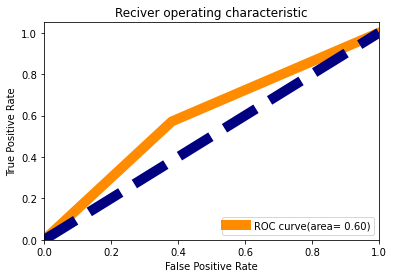

In [178]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(pred_test, y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=10, label='ROC curve(area= %0.2f)' % roc_auc)
plt.plot([0, 1],[0, 1], color='navy', lw=10, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.title('Reciver operating characteristic')
plt.legend(loc='lower right')
plt.show()

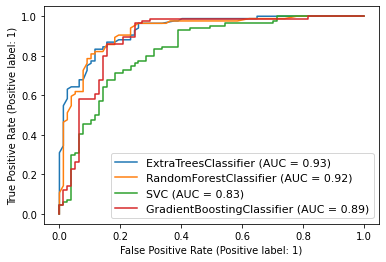

In [179]:
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve

disp = plot_roc_curve(ET, x_test,y_test) # ax_=Axis with confusion matrix
plot_roc_curve(RFC, x_test, y_test, ax = disp.ax_)

plot_roc_curve(svc, x_test, y_test, ax = disp.ax_)
plot_roc_curve(GB, x_test, y_test, ax = disp.ax_)

plt.legend(prop={'size':11}, loc = 'lower right')
plt.show()

Model Saving:

In [181]:
import pickle
filename = 'inhouse_diabetes.pkl'
pickle.dump(Final_model, open(filename, 'wb'))

Conclusion

In [182]:
import numpy as np
a=np.array(y_test)
predicted=np.array(lr.predict(x_test))
df_com=pd.DataFrame({"Original": a, "Predicated":predicted}, index= range(len(a)))
df_com

,Original,Predicated
0,0,0
1,0,0
2,0,1
3,0,0
4,0,0
...,...,...
156,1,0
157,1,1
158,1,1
159,1,1
